# #Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind, chi2_contingency

# #Reading Dataset and basic EDA

In [46]:
t=pd.read_csv("D:/EDA/titanic.csv")

In [47]:
t.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [48]:
t.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [49]:
t.shape

(418, 12)

In [50]:
t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# #Cleaning Dataset

In [52]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
mean_A = t['Age'].mean()
t['Age'].fillna(mean_A, inplace=True)

In [54]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
t = t.drop("Cabin", axis=1)

In [56]:
t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

# #Visualizations


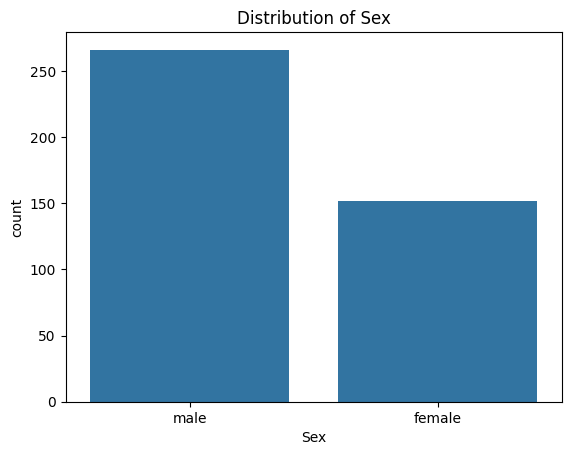

In [57]:
sns.countplot(x='Sex', data=t)
plt.title('Distribution of Sex')
plt.show()

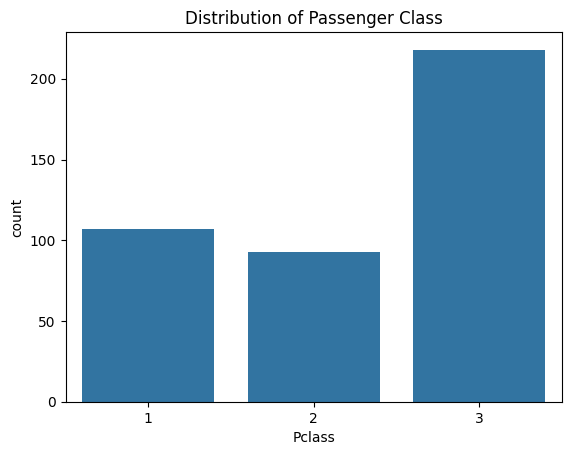

In [58]:
sns.countplot(x='Pclass', data=t)
plt.title('Distribution of Passenger Class')
plt.show()

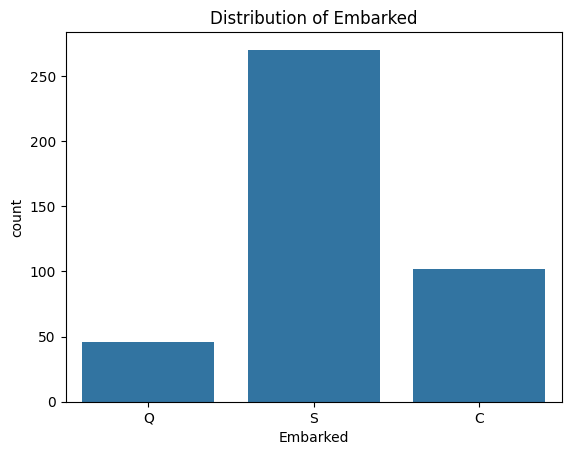

In [59]:
sns.countplot(x='Embarked', data=t)
plt.title('Distribution of Embarked')
plt.show()

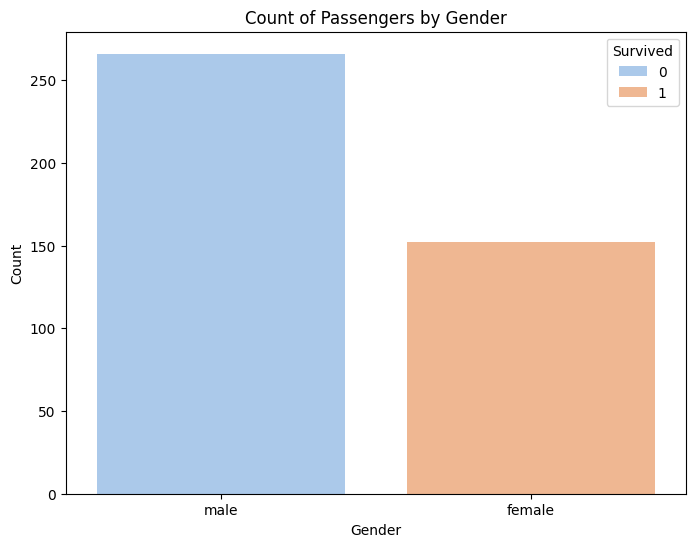

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=t, palette='pastel',hue='Survived')
plt.title('Count of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='Sex', ylabel='Age'>

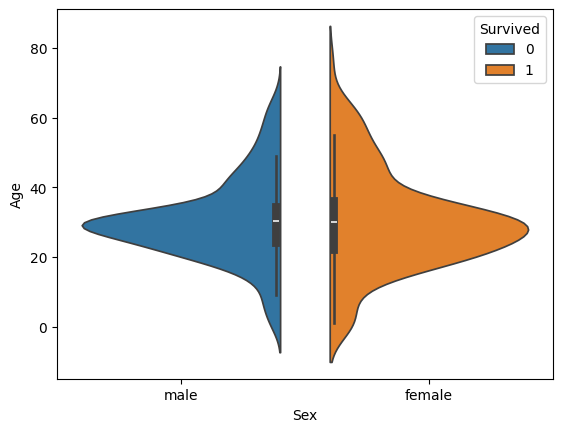

In [61]:
sns.violinplot(x='Sex', y='Age',data=t, hue='Survived', split=True)


<Figure size 800x600 with 0 Axes>

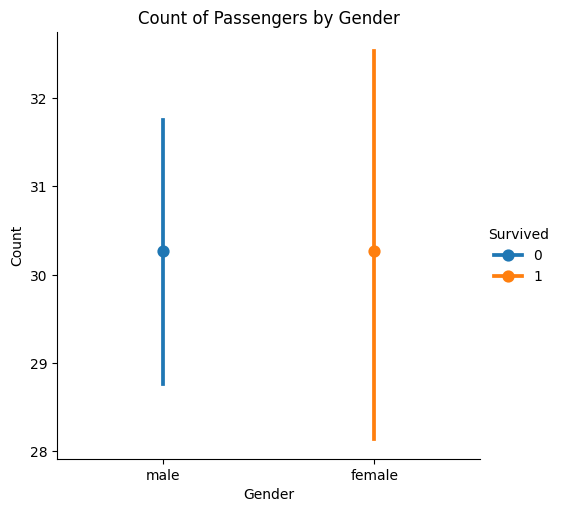

In [62]:
plt.figure(figsize=(8, 6))
sns.catplot(x='Sex', y='Age' ,data=t,hue='Survived',kind='point')
plt.title('Count of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


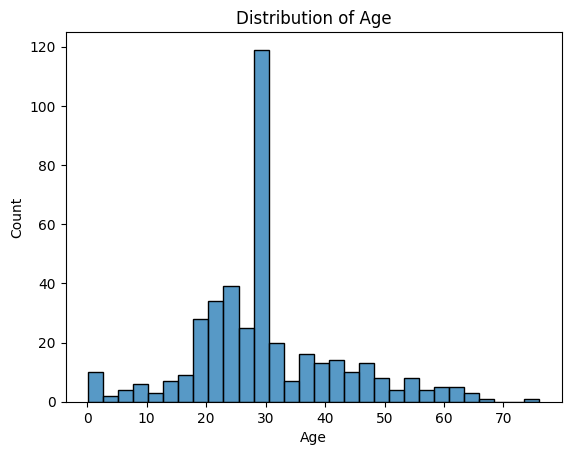

In [63]:
sns.histplot(t['Age'], bins=30)
plt.title('Distribution of Age')
plt.show()



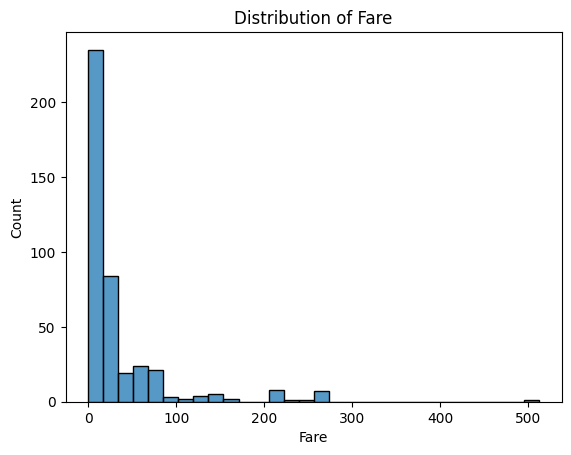

In [64]:
sns.histplot(t['Fare'], bins=30)
plt.title('Distribution of Fare')
plt.show()

# #Grouping and Correlation

In [65]:
filtered_data=t[['Sex','Age','Survived']]
filtered_data.head(5)

,Sex,Age,Survived
0,male,34.5,0
1,female,47.0,1
2,male,62.0,0
3,male,27.0,0
4,female,22.0,1


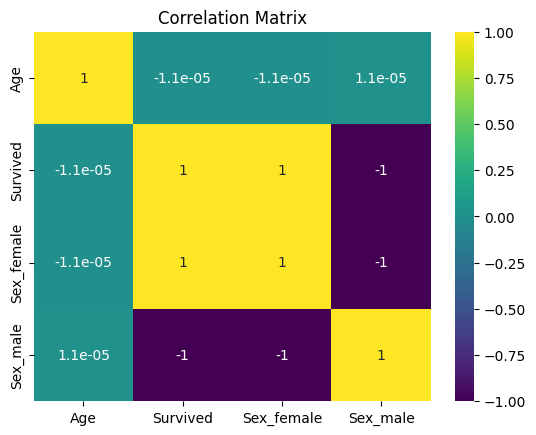

In [66]:
filtered_data1 = pd.get_dummies(filtered_data, columns=['Sex'])
correlation_matrix = filtered_data1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [67]:
survival_by_sex = t.groupby('Sex')['Survived'].mean()
print(survival_by_sex)


survival_by_pclass = t.groupby('Pclass')['Survived'].mean()
print(survival_by_pclass)

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


<Figure size 1000x600 with 0 Axes>

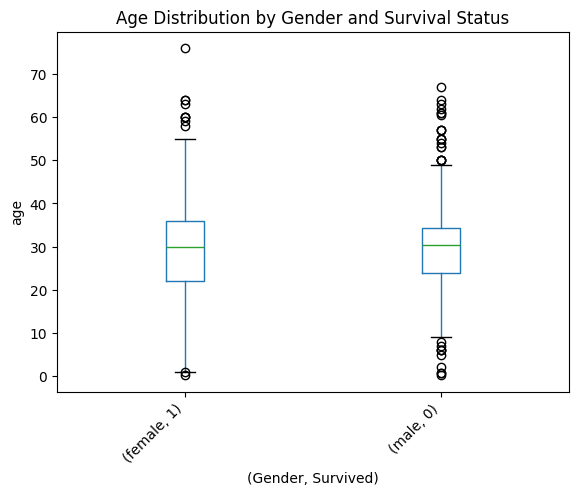

In [68]:
plt.figure(figsize=(10,6))
filtered_data.boxplot(column='Age',by=['Sex','Survived'],grid=False)
plt.title('Age Distribution by Gender and Survival Status')
plt.suptitle("")
plt.xlabel('(Gender, Survived)')
plt.ylabel('age')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1000x600 with 0 Axes>

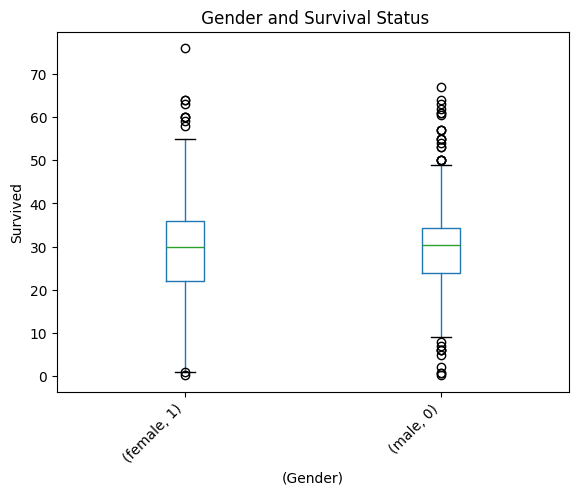

In [69]:
plt.figure(figsize=(10,6))
filtered_data.boxplot(column='Age',by=['Sex','Survived'],grid=False)
plt.title(' Gender and Survival Status')
plt.suptitle("")
plt.xlabel('(Gender)')
plt.ylabel('Survived')
plt.xticks(rotation=45, ha='right')
plt.show()

# #T-test for gender and survival and chi-square test for passenger class and survival


In [71]:
filtered_data2 = t[['Sex', 'Pclass', 'Age', 'Fare', 'Survived']]


male_survived = filtered_data2[filtered_data2['Sex'] == 'male']['Survived']
female_survived = filtered_data2[filtered_data2['Sex'] == 'female']['Survived']
t_stat, p_value = ttest_ind(male_survived, female_survived)
print("T-test for gender and survival:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


contingency_table = pd.crosstab(filtered_data2['Pclass'], filtered_data2['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square test for passenger class and survival:")
print("chi-square statistic:", chi2)
print("p-value:", p)
print("degrees of freedom:", dof)

T-test for gender and survival:
t-statistic: -inf
p-value: 0.0

Chi-square test for passenger class and survival:
chi-square statistic: 6.693869422819262
p-value: 0.03519206276590605
degrees of freedom: 2
